#Case study

Đề bài  2:

Problem Statement:

Các ngân hàng đều muốn giữ chân khách hàng của mình để duy trì hoạt động kinh doanh và ngân hàng Đa quốc gia ABC cũng muốn điều đó.
Dưới đây là dữ liệu khách hàng của các khách hàng tại Ngân hàng Đa quốc gia ABC có phát sinh giao dịch và mục đích của dữ liệu sẽ là dự đoán Tỷ lệ khách hàng rời bỏ.

Giả sử bạn là Data Analyst cho ngân hàng ABC. BOD đang cố gắng tìm hiểu xem tại sao lại xảy ra vấn đề trên và liệu người dùng các dịch vụ có rời bỏ ABC hay không (hủy sử dụng dịch vụ) trong vài ngày tới.

Objective:

Bạn được yêu cầu xây dựng một mô hình dự đoán khách hàng sẽ rời bỏ hay tiếp tục sử dụng dịch vụ. Nó sẽ được team Strategy sử dụng để ước lượng số lượng khách hàng rời bỏ và lên các phương án cải thiện.


#Case analysis


##Explore dataset

**Target**: churn (1: churned, 0: stayed)

**Feature**:

There are 8 columns that can have effect on churn rate of customers and can be used as features: credit_score, age, tenure, balance, products_number, credit_card, active member and estimated salary

`credit_score`: customers with higher credit scores are less likely to leave the bank

`age`: older customers might be less likely to leave the bank compared to young customers (as they tend to change quickly according to banks' benefits and can adapt accordingly)

`tenure`: customers with higher tenure are less likely to leave the bank

`balance`: customers with higher balance are less likely to leave the bank

`products_number`: customers using more than 1 product from a bank are less likely to leave that bank

`credit_card`: customers who open credit card are less likely to leave the bank

`active_member`: customers who are active are less likely to leave the bank

`estimated_salary`: customers with higher salary are less likely to leave the bank

Others columns have little to no effect on customer churn rate of ACB

## Direction

This is a classification problem as there are 2 outcomes: 1 as churned or 0 as stayed.

Some models that can be used: logistic regression, decision tree/ random forest, NBGaussian, KNN/ SVM

According to a journal, random forest and logistic regression are amongst the best models to be used for churn rate prediction => apply these two models (https://www.sciencedirect.com/science/article/pii/S2666603023000143)

Other models will be deployed altogether and the metrics of all will be compared

#EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# csv file named 'Data_Quest_2.cvs' in this folder
# link = 'https://drive.google.com/file/d/1jSn2ONnjlleNsTBaPrdAGJIq-Qh93WDY/view?usp=drive_link'

url = f'https://drive.google.com/uc?id=1jSn2ONnjlleNsTBaPrdAGJIq-Qh93WDY'
df = pd.read_csv(url)
display(df.sample(5))

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7491,15660263,622,France,Male,40,4,99799.76,2,1,0,197372.13,0
3345,15648320,658,France,Female,31,7,123974.96,1,1,0,102153.75,0
5902,15586504,694,France,Male,40,9,0.00,2,1,0,40463.03,0
4516,15812210,497,Germany,Female,32,8,111537.23,4,1,1,9497.99,1
2450,15679294,589,France,Female,46,10,107238.85,2,1,0,37024.28,0


In [3]:
# the number of rows and columns
df.shape

(10000, 12)

- The dataset has 10,000 rows and 12 columns.

In [4]:
# basic stats

display(df.describe())
display(df.describe(exclude = [int, float]))

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


- The bank has an almost equal rate of female to male customers
- The average age of customers is 39 years old
- The average tenure of customers is approx. 5 years
- There are 3 unique countries which are France, Spain and Germany with France being the country with most customers
- `customer_id` will be dropped due to the large unique values; meanwhile, `country` and `gender` should be kept to investigate further

In [5]:
# check null

df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

- This dataset has no null values

In [6]:
# check general info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


- There are two columns with **object** datatype: `country` and `gender` -> encoding required

##Univariate analysis

<Axes: xlabel='churn', ylabel='count'>

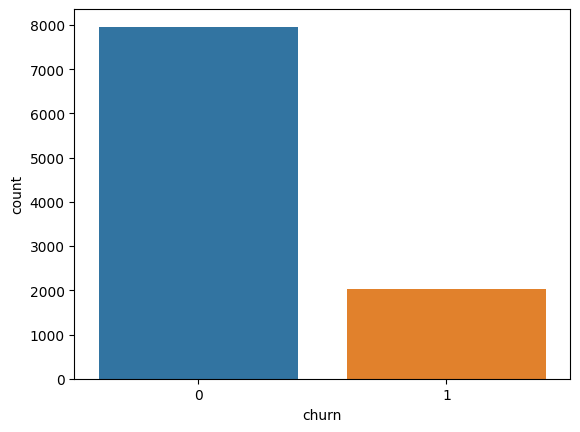

In [7]:
# check imbalance
sns.countplot(x = 'churn', data = df)

- The dataset is quite imbalanced as churn rate is only 1/4 of the other group

##Bivariate analysis

<Axes: xlabel='churn', ylabel='count'>

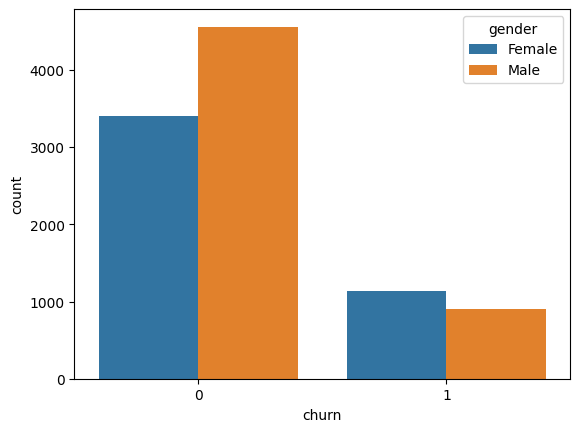

In [8]:
sns.countplot(x = 'churn', hue = 'gender', data = df)

- Female group seems to have a higher churn rate than male

<Axes: xlabel='churn', ylabel='count'>

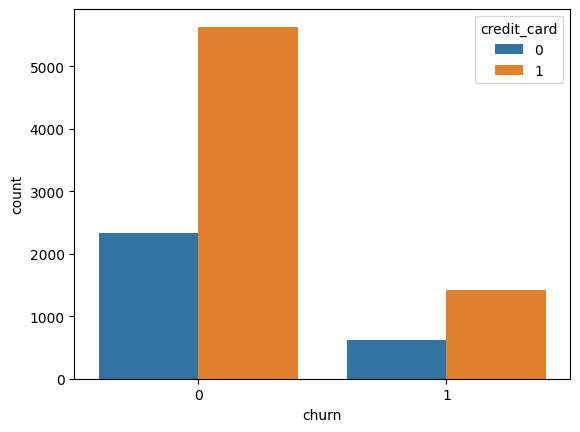

In [9]:
sns.countplot(x = 'churn', hue = 'credit_card', data = df)

- The churn rate of customers with or without credit card is the same to those who stayed

<Axes: xlabel='churn', ylabel='count'>

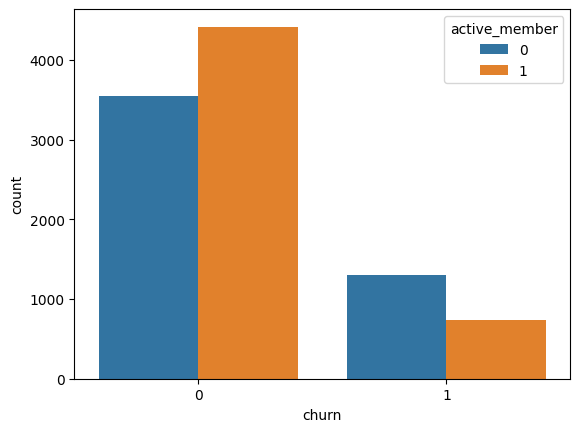

In [10]:
sns.countplot(x = 'churn', hue = 'active_member', data = df)

- Non-active customers have a higher churn rate

<Axes: xlabel='churn', ylabel='count'>

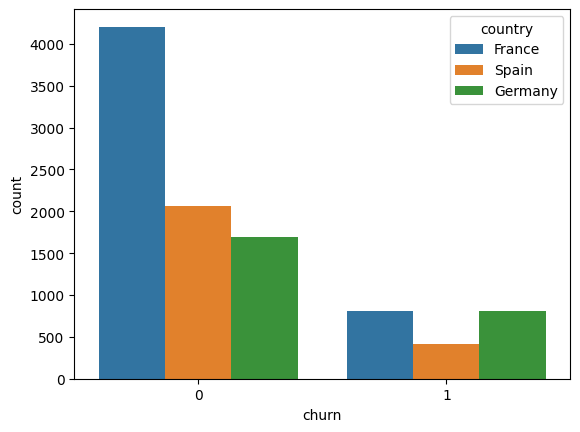

In [11]:
sns.countplot(x = 'churn', hue = 'country', data = df)

- France and Germany have a slightly equal churn rate but nothing else

##Correlation

<ipython-input-12-ae25f5c3639d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


<Axes: >

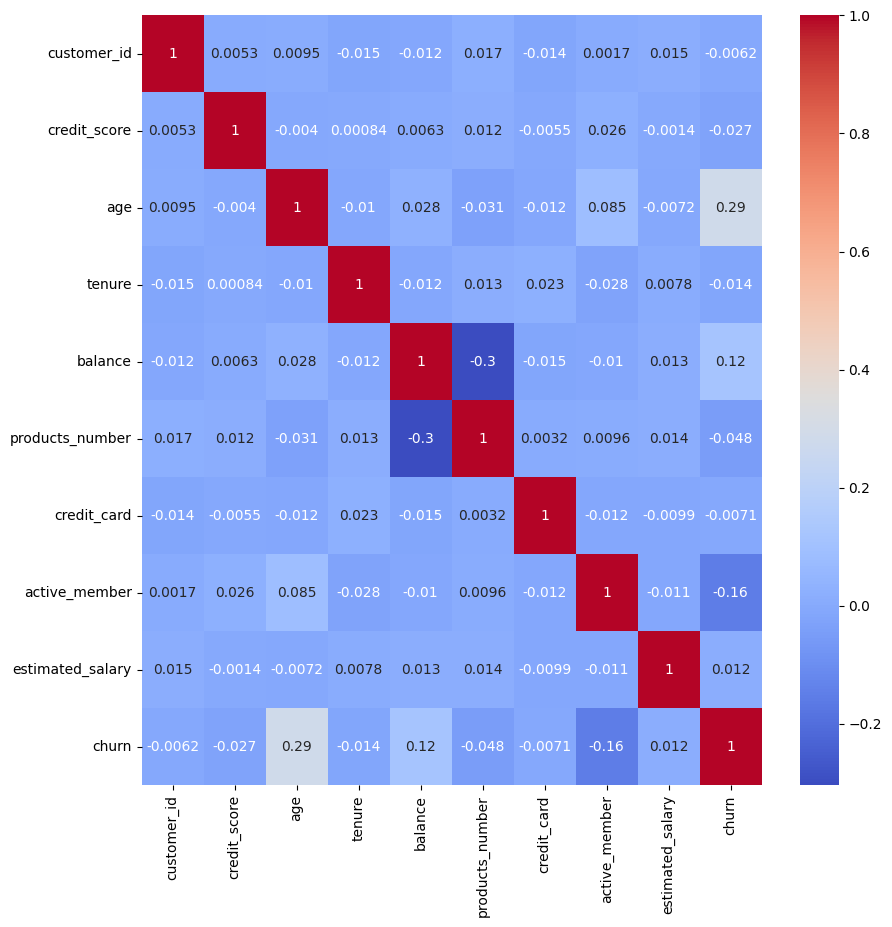

In [12]:
# check correl
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

- `age` and `balance` have  substantially proportionate proportions with churn rate
- `active_member` has substantially inverse proportion with churn rate

# Data pre-processing

## Remove non-use columns

In [13]:
df.keys()

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [14]:
df.drop(columns = ['customer_id'], inplace = True)

##Remove duplicated data

In [15]:
# check duplicates
df.duplicated().sum()

0

##Encoding

In [16]:
# get datatype
df.select_dtypes(include = 'object')

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [17]:
# one-hot encoding
df = pd.get_dummies(df)
display(df.head(3))

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0


# Logistic regression model

## Version 1

###Train model

In [18]:
# train-test split
X = df.drop(columns = ['churn'])
y = df['churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

(8000, 13) (2000, 13)


In [19]:
# scale data (due to the `balance` and `estimated_salary` columns)
from sklearn.preprocessing import StandardScaler
model_scale = StandardScaler()
model_scale.fit(X_train)
X_train_scale = model_scale.transform(X_train)
X_test_scale = model_scale.transform(X_test)
X_train_scale

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ...,  1.73494238,
        -0.91324755,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57638802,
         1.09499335, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755]])

In [20]:
# create and train model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_scale, y_train)

LogisticRegression()

###Evaluate model

Score testing of Logistic Regression is : 0.811


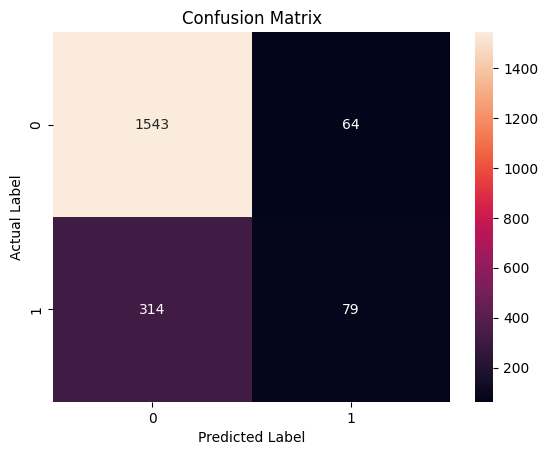

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [21]:
y_pred = model_lr.predict(X_test_scale)

# use metrics to assess
y_pred = model_lr.predict(X_test_scale)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Score testing of Logistic Regression is : {}".format(score))
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = "g", ax = ax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")
ax.set_title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))

- Although the accuracy is high (0.81), the metrics for class 1 are far worse than class 0 (with f1_score for class 1 only at 0.29!) => this model is not good due to the imbalance of the dataset (with more value of 0 than 1). Therefore, class_weight will be added to the model and the model will be re-trained.

##Add class_weight (Version 2)

In this version, the parameter class_weight will be added to the model to add the 'weight' for the minority class 1.

In [22]:
# create and train model
from sklearn.linear_model import LogisticRegression
model_lr2 = LogisticRegression(class_weight = 'balanced')
model_lr2.fit(X_train_scale, y_train)

LogisticRegression(class_weight='balanced')

Score testing of Logistic Regression is : 0.7195


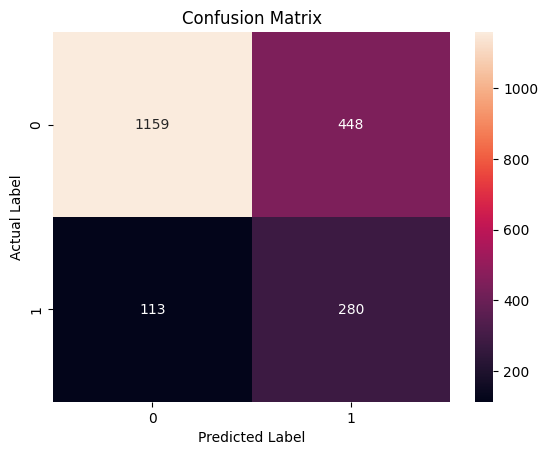

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000



In [23]:
y_pred = model_lr2.predict(X_test_scale)

# use metrics to assess
y_pred = model_lr2.predict(X_test_scale)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Score testing of Logistic Regression is : {}".format(score))
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = "g", ax = ax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")
ax.set_title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))

- After adding class_weight and re-trained the model, accuracy goes down to 0.72 but f1_score for class 1 increases to 0.50, which is better than before. However, the metrics are still quite low so SMOTE method will be applied to resample the dataset.

##Oversampling with SMOTE (Version 3)

In this version, SMOTE method will be used to upsample the minority class 1. After that, the new balanced dataset will be applied to create and train a new Linear Regression model.

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
oversample = SMOTE()

df_dummy = pd.get_dummies(df, drop_first = True)
X = df_dummy.drop(columns = ['churn'])
y = df_dummy['churn']
X_sm, y_sm = sm.fit_resample(X, y)
print(X_sm.shape, y_sm.shape)

(15926, 13) (15926,)


In [25]:
from sklearn.model_selection import train_test_split
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 42)
print(X_sm_train.shape, X_sm_test.shape)

(12740, 13) (3186, 13)


In [26]:
# scale data
from sklearn.preprocessing import StandardScaler
model_scale = StandardScaler()
model_scale.fit(X_sm_train)
X_sm_train_scale = model_scale.transform(X_sm_train)
X_sm_test_scale = model_scale.transform(X_sm_test)
X_sm_train_scale

array([[ 0.48005568,  1.4892828 , -1.40531558, ..., -0.46137976,
        -0.81342909, -0.84852496],
       [ 1.10666547,  0.09623846, -1.40531558, ..., -0.46137976,
        -0.81342909,  1.17851572],
       [-0.49833504,  1.7877923 , -1.40531558, ..., -0.46137976,
        -0.81342909, -0.84852496],
       ...,
       [ 0.20522683,  0.19574163,  1.18353059, ..., -0.46137976,
        -0.81342909,  1.17851572],
       [-1.21289005,  0.49425113, -0.29581007, ...,  2.16741192,
        -0.81342909,  1.17851572],
       [ 0.53502145,  0.99176696, -1.40531558, ..., -0.46137976,
        -0.81342909,  1.17851572]])

In [27]:
# create and train model
from sklearn.linear_model import LogisticRegression
model_lr3 = LogisticRegression()
model_lr3.fit(X_sm_train_scale, y_sm_train.ravel())

LogisticRegression()

Score testing of Logistic Regression is : 0.8396107972379159


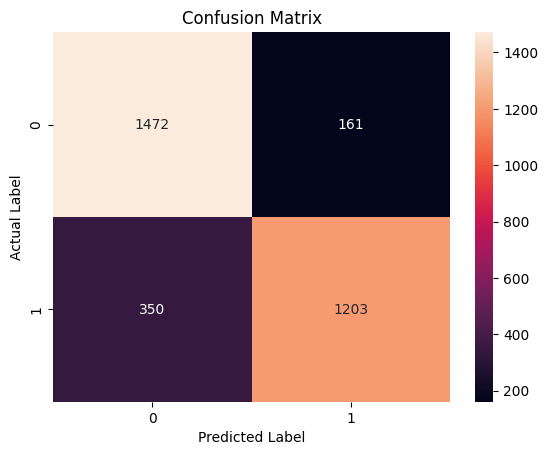

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1633
           1       0.88      0.77      0.82      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



In [28]:
y_pred = model_lr3.predict(X_sm_test_scale)

# use metrics to assess
y_pred = model_lr3.predict(X_sm_test_scale)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
score = accuracy_score(y_sm_test, y_pred)
cm = confusion_matrix(y_sm_test, y_pred)
print("Score testing of Logistic Regression is : {}".format(score))
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = "g", ax = ax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")
ax.set_title("Confusion Matrix")
plt.show()
print(classification_report(y_sm_test, y_pred))

- After oversampling the minority class 1 using SMOTE, accuracy goes up to 0.84 and all the metrics for class 1 improve significantly with f1_score being at 0.82

=> This is the best version amongst the three Logistic Regression models.

#Random forest model

##Version 1

In [29]:
# create and train model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

Score testing of Random Forest Classifier is : 0.863


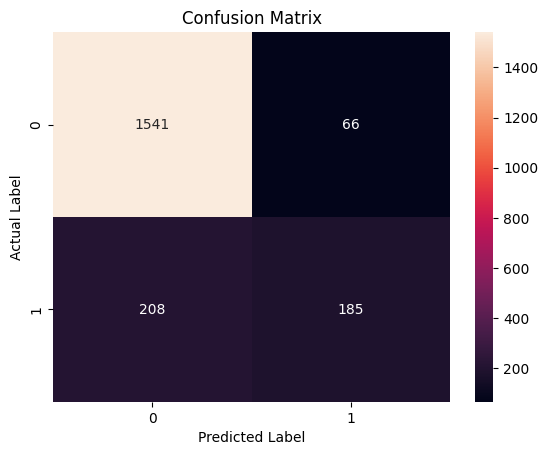

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [30]:
# evaluate model
y_pred = model_rf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Score testing of Random Forest Classifier is : {}".format(score))
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = "g", ax = ax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")
ax.set_title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))

- Compared to Logistic regression model, this model has a high accuracy of 0.869 and good f1_score of 0.753. With this model, some hyperparameter tuning will be applied to improve the model.

## Hyperparameters tuning (Version 2)

In this version, some main parameters of the Random Forest Classifier model will be tuned through GridSearchCV to achieve a better result. These parameters are **n_estimators, max_features, max_depth and max_leaf_nodes**.

In [31]:
# # model tuning
# from sklearn.model_selection import GridSearchCV
# params = {
#     'n_estimators': [32, 34, 36, 38, 40],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [18, 20, 22, 24, 26],
#     'max_leaf_nodes': [18, 20, 22, 24, 26],
# }
# grid_search = GridSearchCV(RandomForestClassifier(), cv = 2, param_grid=params)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)

In [32]:
# # re-train model
# from sklearn.ensemble import RandomForestClassifier
# model_rf2 = RandomForestClassifier(max_depth=18, max_features=None, max_leaf_nodes=26, n_estimators=40)
# model_rf2.fit(X_train, y_train)

In [33]:
# # re-evaluate model
# y_pred = model_rf2.predict(X_test)
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# score = accuracy_score(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)
# print("Score testing of Random Forest Classifier 2 is : {}".format(score))
# ax = plt.subplot()
# sns.heatmap(cm, annot = True, fmt = "g", ax = ax)
# ax.set_xlabel("Predicted Label")
# ax.set_ylabel("Actual Label")
# ax.set_title("Confusion Matrix")
# plt.show()
# print(classification_report(y_test, y_pred))

- After a series of tuning, accuracy and the metrics tend to stay constant or get worse. Therefore, oversampling method with SMOTE will be attempted to see whether the model can be improved.

##Oversampling with SMOTE (Version 3)

In [34]:
# re-train model
from sklearn.ensemble import RandomForestClassifier
model_rf3 = RandomForestClassifier(max_depth=18, max_features=None, max_leaf_nodes=26, n_estimators=40)
model_rf3.fit(X_sm_train, y_sm_train.ravel())

RandomForestClassifier(max_depth=18, max_features=None, max_leaf_nodes=26,
                       n_estimators=40)

Score testing of Random Forest is : 0.8527934714375393


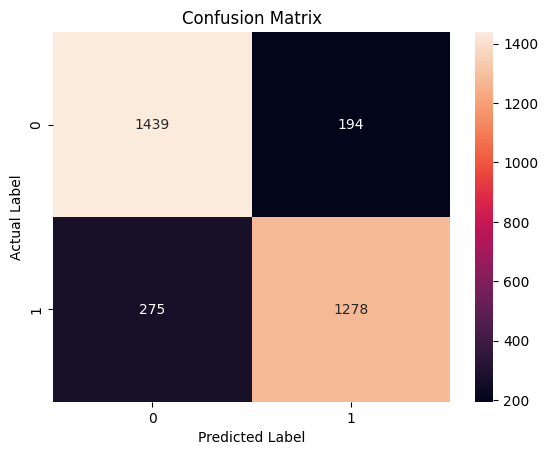

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1633
           1       0.87      0.82      0.84      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



In [35]:
y_pred = model_rf3.predict(X_sm_test)

# use metrics to assess
y_pred = model_rf3.predict(X_sm_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
score = accuracy_score(y_sm_test, y_pred)
cm = confusion_matrix(y_sm_test, y_pred)
print("Score testing of Random Forest is : {}".format(score))
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = "g", ax = ax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")
ax.set_title("Confusion Matrix")
plt.show()
print(classification_report(y_sm_test, y_pred))

- After oversampling, accuracy goes down a bit to 0.85 but the metrics for class 1 improve significantly

=> This model is the best amongst all three versions and is also slightly better than Logistic Regression after being oversampled.


---


**Comparison**

Version      | Logistic Regression            | Random Forest Classifier
-------------|--------------------------------|---------------------------------
1            | accuracy 0.81, f1_score 0.29   | accuracy 0.86, f1_score 0.58
2 (tuning)   | accuracy 0.72, f1_score 0.50   | accuracy 0.86, f1_score 0.56
3 (SMOTE)    | accuracy 0.84, f1_score 0.82   | accuracy 0.85, f1_score 0.84

#Test multiple models

In [ ]:
# importing the auxiliar and preprocessing librarys
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts

xyz=[]
accuracy=[]
std=[]
final_results = []
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[SVC(kernel='linear'),SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    final_results.append(cv_result)
    accuracy.append(cv_result)
from IPython.display import clear_output
clear_output()
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

new_models_dataframe2.style.highlight_max(color='lightgreen', axis=0)